In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess

spine1_x=np.load("path_spine1/x_final.npy")
spine1_y=np.load("path_spine1/y_final.npy")

spine2_x=np.load("path_spine2/x_final.npy")
spine2_y=np.load("path_spine2/y_final.npy")

spine3_x=np.load("path_spine3/x_final.npy")
spine3_y=np.load("path_spine3/y_final.npy")


In [2]:
spine1_x,spine2_x,spine3_x,spine1_x.shape

(array([  0,   0,   0, ..., 448, 449, 450]),
 array([   0,    0,    0, ..., 1691, 1690, 1691]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 

In [3]:
threshold=450
spine_x=[spine1_x[spine1_x<threshold],spine2_x[spine2_x<threshold],spine3_x[spine3_x<threshold]]
spine_y=[spine1_y[spine1_x<threshold],spine2_y[spine2_x<threshold],spine3_y[spine3_x<threshold]]


1800 1800
3488 3488
450 450


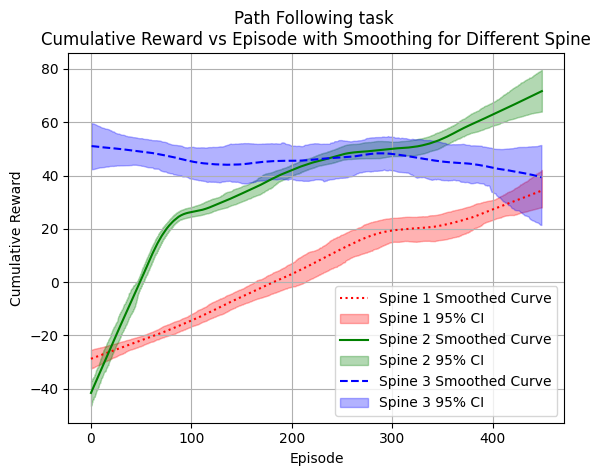

In [4]:
colors = ["red",'g', 'blue']
labels = ['Spine 1','Spine 2', 'Spine 3']
styles=[":","-",'--']

# Number of bootstrap samples
n_bootstraps = 100

for i in range(3):
    x,y=spine_x[i],spine_y[i]
    print(len(x),len(y))
    # Storage for bootstrapped smoothed curves
    smoothed_bootstraps = []

    # Generate bootstrapped smoothed curves
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(x), len(x), replace=True)
        bootstrap_x = x[indices]
        bootstrap_y = y[indices]
        smoothed = lowess(bootstrap_y, bootstrap_x, frac=0.3)
        smoothed_bootstraps.append(smoothed)

    # Extract smoothed values from bootstraps
    smoothed_x = np.mean([sb[:, 0] for sb in smoothed_bootstraps], axis=0)
    smoothed_y_mean = np.mean([sb[:, 1] for sb in smoothed_bootstraps], axis=0)

    # Calculate 95% confidence interval
    smoothed_y_bootstraps = np.array([sb[:, 1] for sb in smoothed_bootstraps])
    ci_lower = np.percentile(smoothed_y_bootstraps, 2.5, axis=0)
    ci_upper = np.percentile(smoothed_y_bootstraps, 97.5, axis=0)

    # Plot smoothed line
    plt.plot(smoothed_x, smoothed_y_mean, linestyle=styles[i],color=colors[i], label=f"{labels[i]} Smoothed Curve")

    # Plot shaded region for confidence interval
    plt.fill_between(smoothed_x, ci_lower, ci_upper, color=colors[i], alpha=0.3, label=f"{labels[i]} 95% CI")

# Add labels, title, grid, and legend
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Path Following task \nCumulative Reward vs Episode with Smoothing for Different Spine")
plt.grid(True)
plt.legend()

# Show the plot or save it
plt.show()
